In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def beta_from_energy(E):
    """
    E given in eV
    """
    exp1 = E/(938.)
    beta = np.sqrt(1. - ((1/exp1)**2))
    gamma = 1./np.sqrt(1.-(beta*beta))
    Ekmax = 2*.511*gamma**2
    me_m = 1./1836.
    Ekright = 2.*.511*(beta**2)*(gamma**2)/(1.+2*(me_m)*gamma + (me_m**2))
    return gamma,beta,Ekmax,Ekright


In [4]:
m0c2 = 938.27*1e6 #eV
E = np.linspace(m0c2+0.00001,4.*1e10,100) #ev

beta = np.sqrt(1. - (m0c2/(E))**2)

term1 = (1./ (beta*E))**2
term2 = m0c2
term3 = 1./((E**2/m0c2) - (1./3. * (E**2/m0c2)**3))

F = term1*term2*term3

y = np.log(-1.*F)


In [23]:
#plt.figure(1)
#plt.clf()
#plt.subplot(121)
#plt.plot(y)
#plt.title('log')
#plt.subplot(122)
#plt.title('F')
#plt.show()

plotting = True
A=5.37*1e-4 #g/cm2 /keV
B=0.9815
C=3.123*1e-3 #1/KeV
rho = 1.*1e-7
E = np.linspace(0,1.,1000) #in keV

r = A*E*(1 - (B/(1+(C*E))))
r /= rho
##################
    
##################    


#F=4.19/(x**2)

result = integrate.quad(lambda x: 4.17/(x**2),4.17,127*1e9)
print result
#cumulative probability
prob = []
sum1=0.
x = np.linspace(4.17,300,1000)
deltax = x[1]-x[0]
for i in range(len(F)-1):
    int1 = integrate.quad(lambda x: 4.17/(x**2),x[i],x[i+1])
    sum1+=int1[0]
    prob.append(sum1)

prob=np.array(prob)



(-3.2834645736029733e-11, 2.498103056802326e-14)


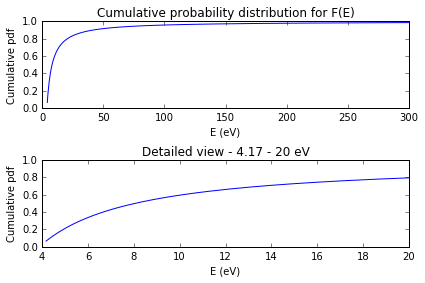

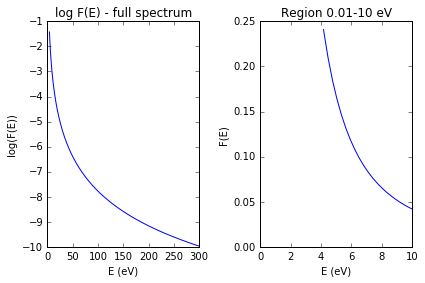

In [24]:

if plotting:
    plt.figure(2)
    plt.clf()
    plt.subplot(211)
    plt.ylabel('Cumulative pdf')
    plt.xlabel('E (eV)')
    plt.title('Cumulative probability distribution for F(E)')
    plt.plot(x[:-1],prob)
    
    plt.subplot(212)
    plt.plot(x[:-1],prob)
    plt.title('Detailed view - 4.17 - 20 eV')
    plt.ylabel('Cumulative pdf')
    plt.xlabel('E (eV)')
    plt.xlim([4.,20.])
    
    plt.tight_layout()
    plt.show()
    ##############
    plt.figure(1)
    plt.clf()
    plt.subplot(121)
    plt.plot(x,np.log(F))
    plt.ylabel('log(F(E))')
    plt.xlabel('E (eV)')
    plt.title('log F(E) - full spectrum')
    
    plt.subplot(122)
    plt.ylabel('F(E)')
    plt.xlabel('E (eV)')
    plt.plot(x,F)
    plt.xlim([0,10])
    plt.title('Region 0.01-10 eV')
    
    plt.tight_layout()
    plt.show()

In [15]:
print 'between 4.17 and 27.28 : '+str(4.17*((1./4.17)- (1./27.28)))
print 'between 27.28 and 40 : '+str(4.17*((1./27.28)- (1./40.)))

between 4.17 and 27.28 : 0.847140762463
between 27.28 and 40 : 0.0486092375367


In [17]:
1/((1./4.17)-(1./(127*1e9)))

4.170000000136921

In [21]:
integrate.quad(lambda x: (x**2),0,3)

(9.000000000000002, 9.992007221626411e-14)